<a href="https://colab.research.google.com/github/tbonne/IntroPychStats/blob/main/notebooks/lm_performance_quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=16mShJ3xnM8SyYIsXUeTlqUJYI-o81768' width=500>

#<font color='darkorange'>Asking and answering questions using Linear Regression</font>

In this notebook we'll use the student performance dataset to ask and answer specific questions.


### 1. Load in the data

Lets load in some packages. These have functions that other people have made, and will hopefully make our lives a lot easier!

In [ ]:
install.packages("jtools")
install.packages("ggstance")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pander’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Then let's load in the student test performance dataset.

In [ ]:
#here we will read in a csv file and place it into something called df
df_grade <- read.csv("https://raw.githubusercontent.com/tbonne/IntroPychStats/main/data/student_alcohol.csv", header = T)

#let's take a look at the data
head(df_grade)

,school,sex,age,traveltime,Walc,health,absences,Grade
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,2,1,3,4,11
2,GP,F,17,1,1,3,2,11
3,GP,F,15,1,3,3,6,12
4,GP,F,15,1,1,5,0,14
5,GP,F,16,1,2,5,0,13
6,GP,M,16,1,2,5,6,13


Variables we have in this dataset:

> school - The school the student took the exam at

> sex - the biological sex recorded for the student

> age - the age of the student

> traveltime - the time spent traveling to school

> Walc - amount of alcohol comsumption by the student on the weekends

> health - the reported health level of the student

> absences - the number of absences of the student

> Grade - the grade the student recieved on the test

### 2. Visualize our data

Let's plot the scatterplot. Here we will choose: 
> What we'd like to predict and put it on the y-axis.

> What we'd like to use to help make those predictions and put it on the x-axis.


Let's take a look at the scatterplot between weekend alcohol consumption and grades.

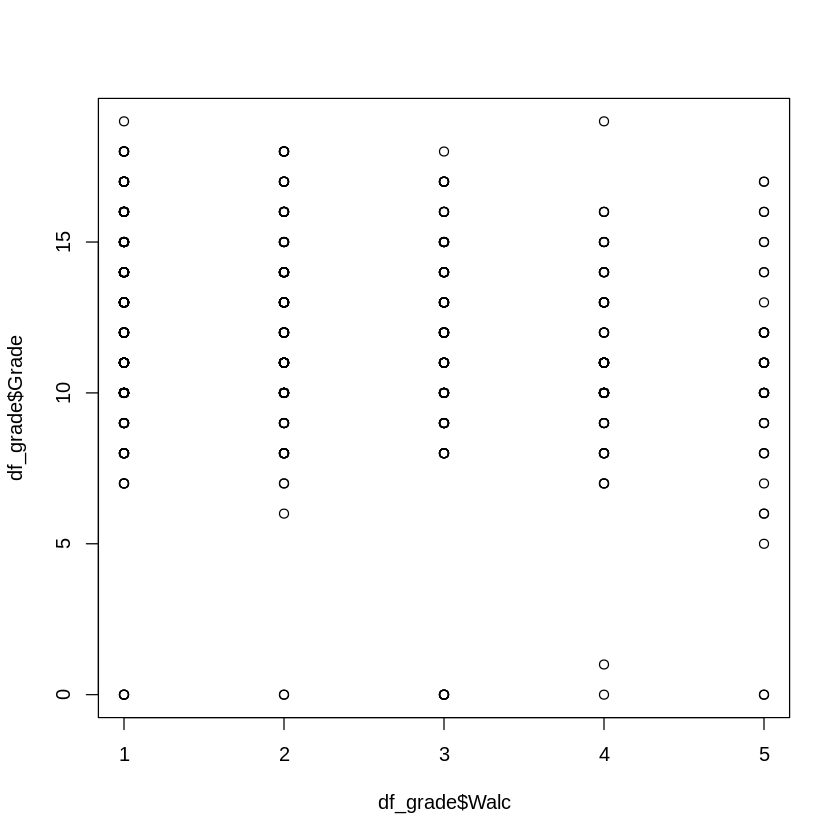

In [ ]:
plot(x=df_grade$Walc,y=df_grade$Grade) 

Let's take a look at the box plot between schools and grades.

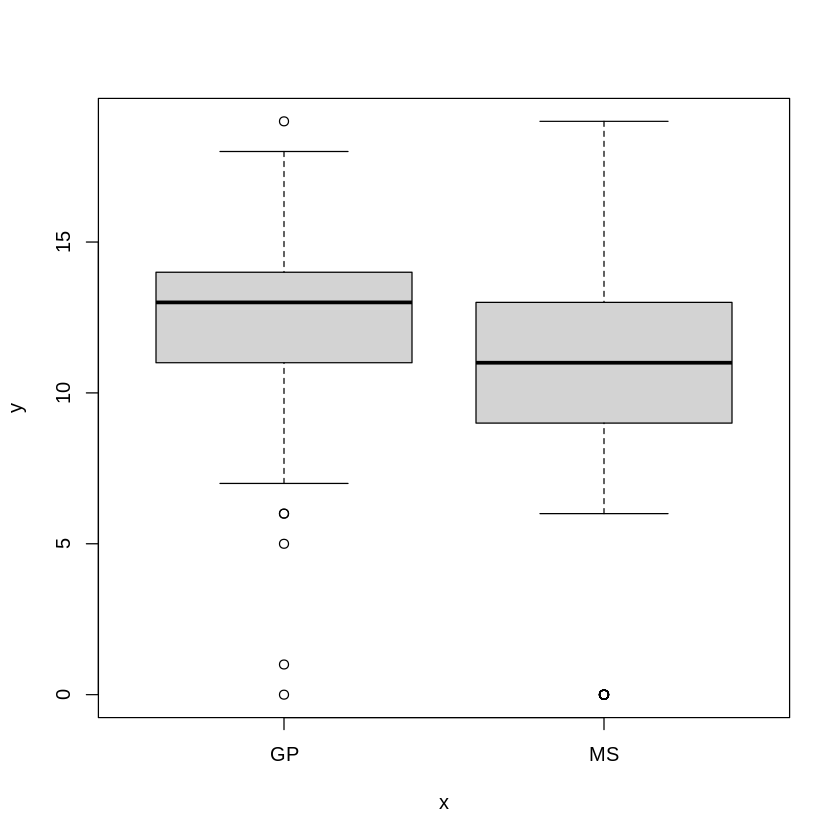

In [ ]:
plot(x=factor(df_grade$school),y=df_grade$Grade) 

### 3. Define and fit our model

Now we can speficy the model we'd like to fit.
> Remember, here we use the formula: "what we'd like to predict" ~ "what we'd like to use to help make those predictions."

> Remember too that to write this formula you should use the column names in the dataframe above (watch for spelling mistakes, and upper/lower case letters)
  

<font color = "darkred"> (?) for the question mark below you should replace it with the formula that will help you answer your question. </font>

In [ ]:
#fit a linear model
model_grade <- lm(?, data=df_grade)


This bit of code then use our inputs to find the best fit linear equation for:
> $grades \sim Normal(\mu, \sigma) $

> $\mu = a + b_{sex} * sex + b_{school}*school + b_{Walc}*Walc$

Let's use the summ function to tell us what values of a and b it found for the best fit line. 
> We'll calculate our 95% confidence interval here too!
> We'll also use scale=TRUE to help make our estimates more comparable.

In [ ]:
#What does the best fit model look like?
summ(model_grade, confint=TRUE, scale = TRUE)

MODEL INFO:
Observations: 649
Dependent Variable: Grade
Type: OLS linear regression 

MODEL FIT:
F(3,645) = 29.66, p = 0.00
R² = 0.12
Adj. R² = 0.12 

Standard errors: OLS
---------------------------------------------------------
                     Est.    2.5%   97.5%   t val.      p
----------------- ------- ------- ------- -------- ------
(Intercept)         12.89   12.52   13.25    69.24   0.00
Walc                -0.44   -0.69   -0.20    -3.52   0.00
schoolMS            -1.97   -2.47   -1.48    -7.86   0.00
sexM                -0.72   -1.22   -0.21    -2.79   0.01
---------------------------------------------------------

Continuous predictors are mean-centered and scaled by 1 s.d.

### 4. Visualize the results

Let's take a look at the estimates a little more visually

Loading required namespace: broom.mixed



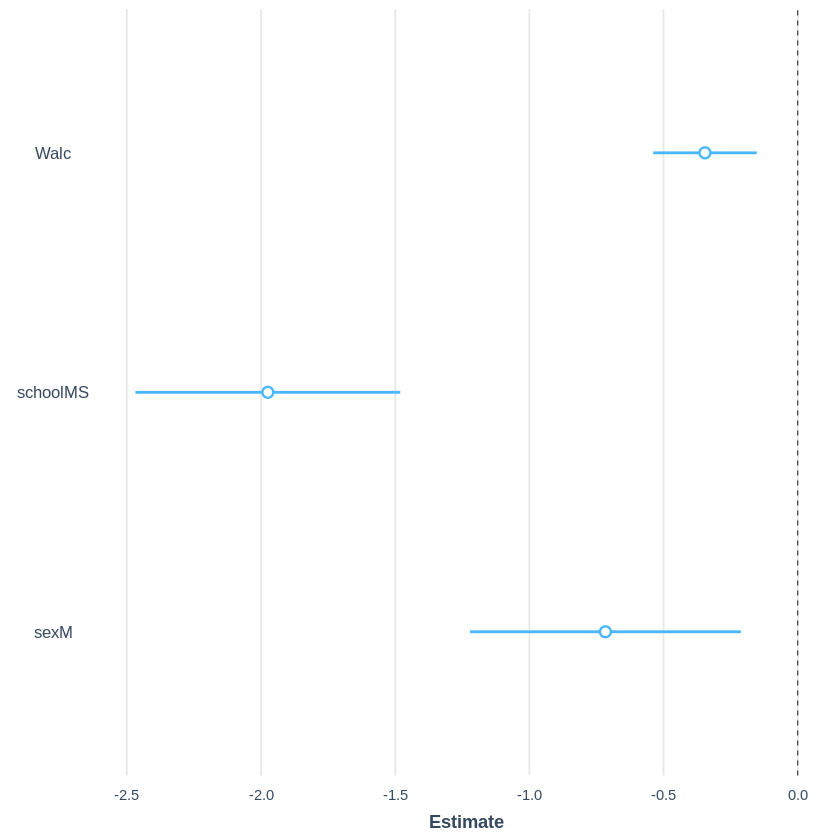

In [ ]:
#plot the estimates of the slopes
plot_summs(model_grade)

Let's take a look at the regression line a little more visually

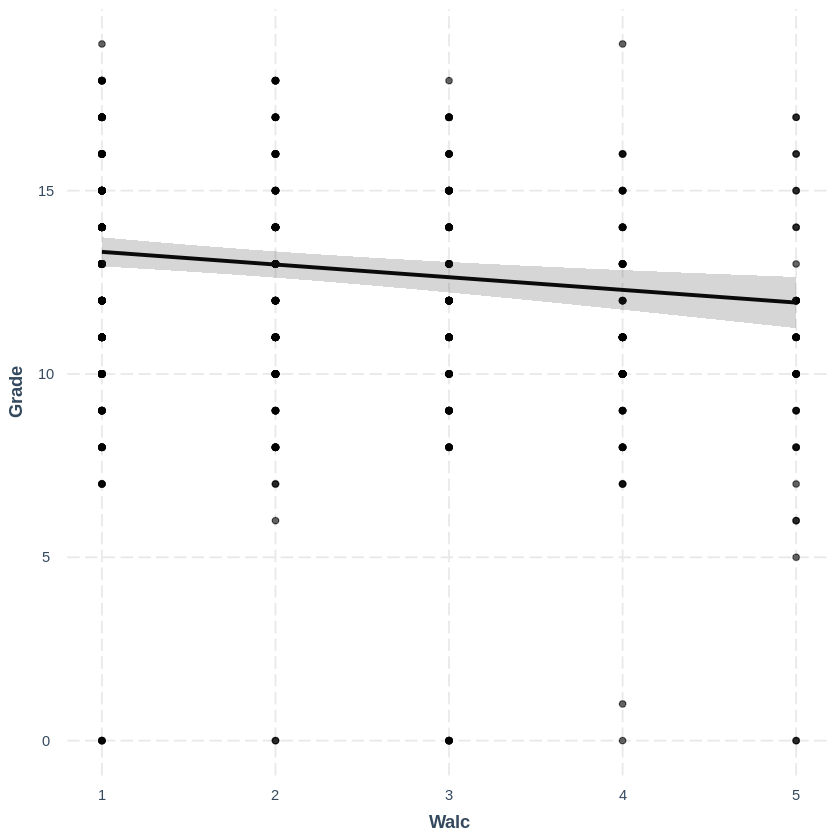

In [ ]:
#plot line on the data
effect_plot(model_grade, pred = Walc, interval = TRUE, plot.points = TRUE)

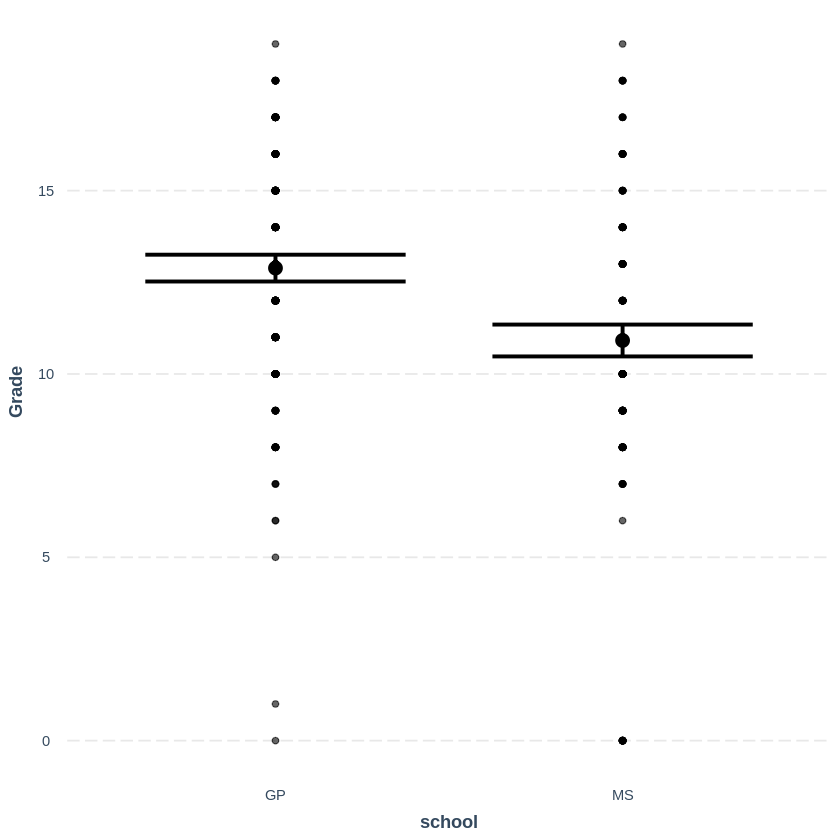

In [ ]:
#plot line on the data
effect_plot(model_grade, pred = school, interval = TRUE, plot.points = TRUE)

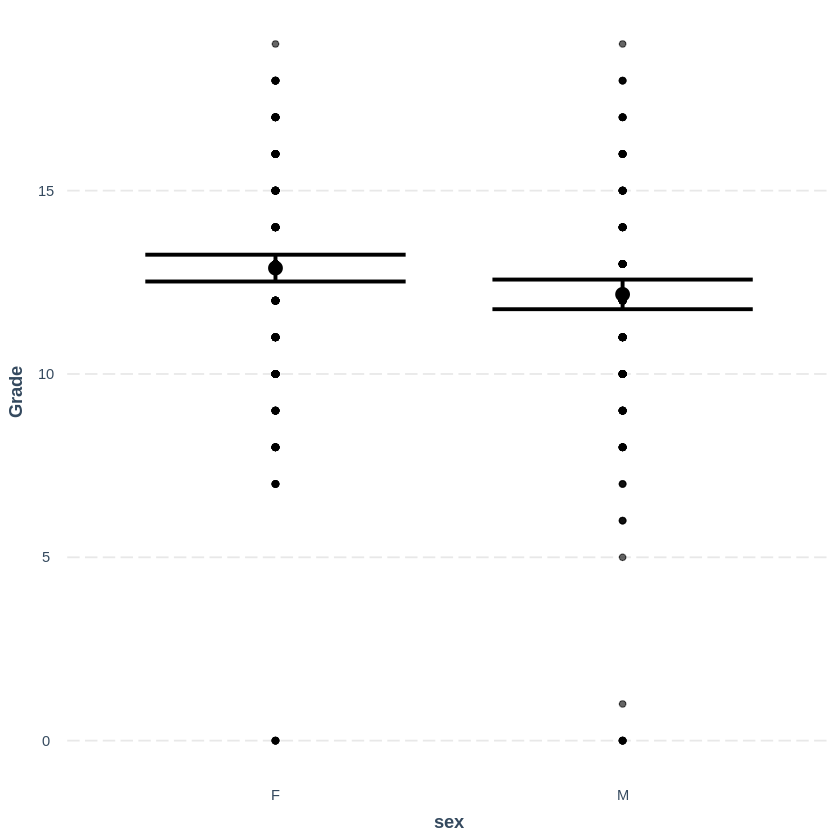

In [ ]:
#plot line on the data
effect_plot(model_grade, pred = sex, interval = TRUE, plot.points = TRUE)

### 5. Checking assumptions

**Assumption 1**

Let's check the assumption that the errors (residuals) are normally distributed.

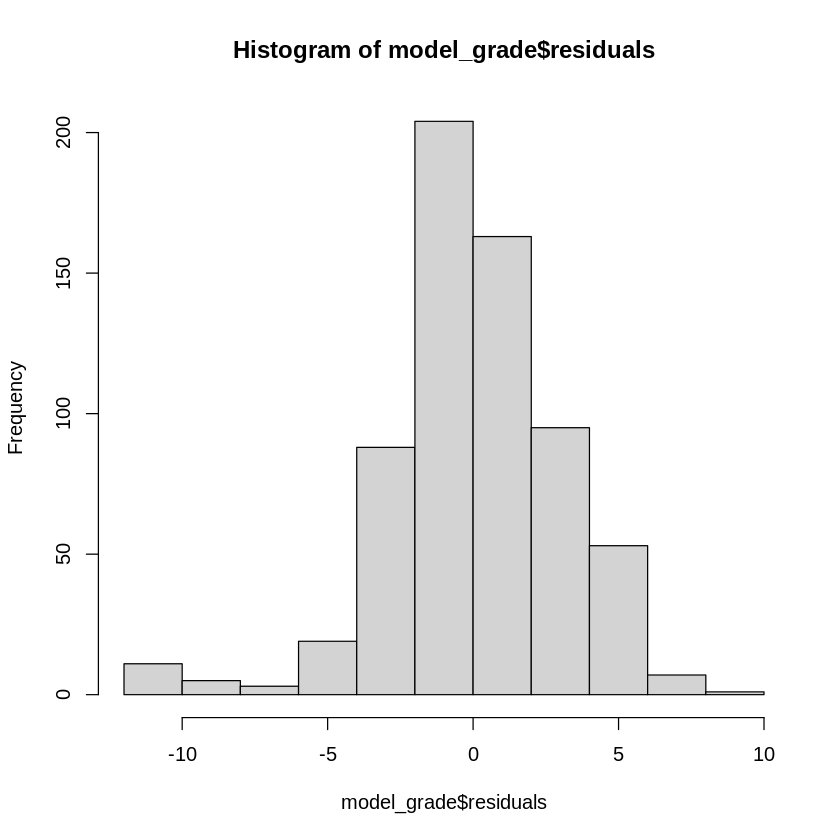

In [ ]:
hist(model_grade$residuals)

The above plot is just like the histograms we've looked at in the past. Now we are looking at how errors are distributed.

> If the errors do not look to have many small errors and few large errors (both positive and negative) then a normal distribution might not be the best model of the data. We might also be missing an important variable...

**Assumption 2** - no patterns in the residuals
  
Let's check the assumption that the variance in the errors is constant.

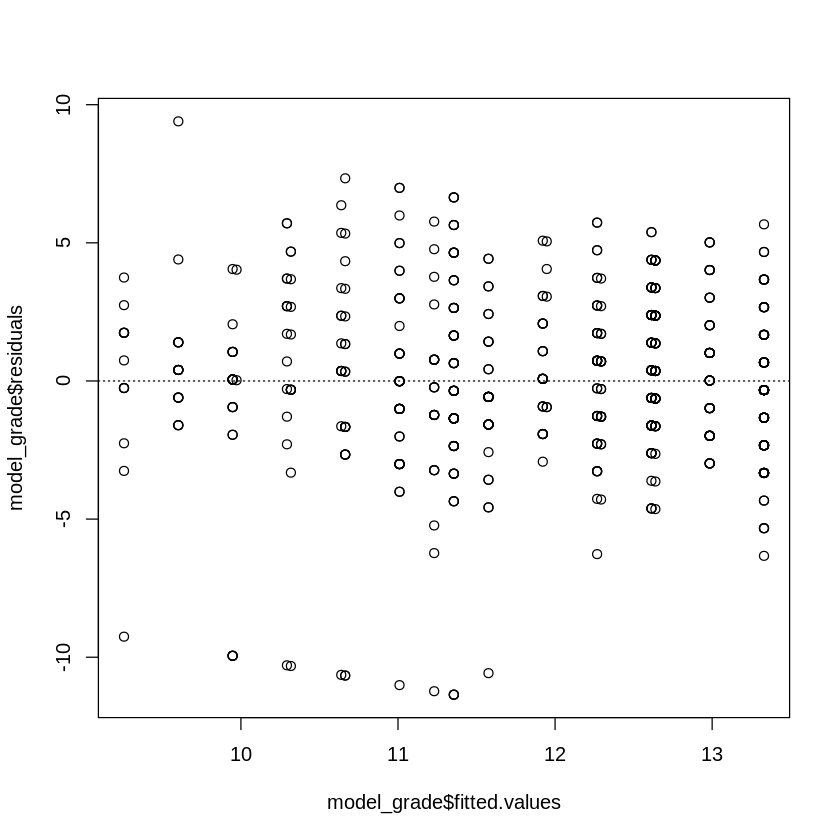

In [ ]:
plot(y=model_grade$residuals, x=model_grade$fitted.values)
abline(h = 0, lty=3)

**Assumption 2** - no patterns in the residuals
   
Let's check the assumption that the relationship between your variables is linear (i.e., that a straight line and not a curvy line fit the data best). We can see this intuatively in the origianl scatter plot, or we can look at the residuals!

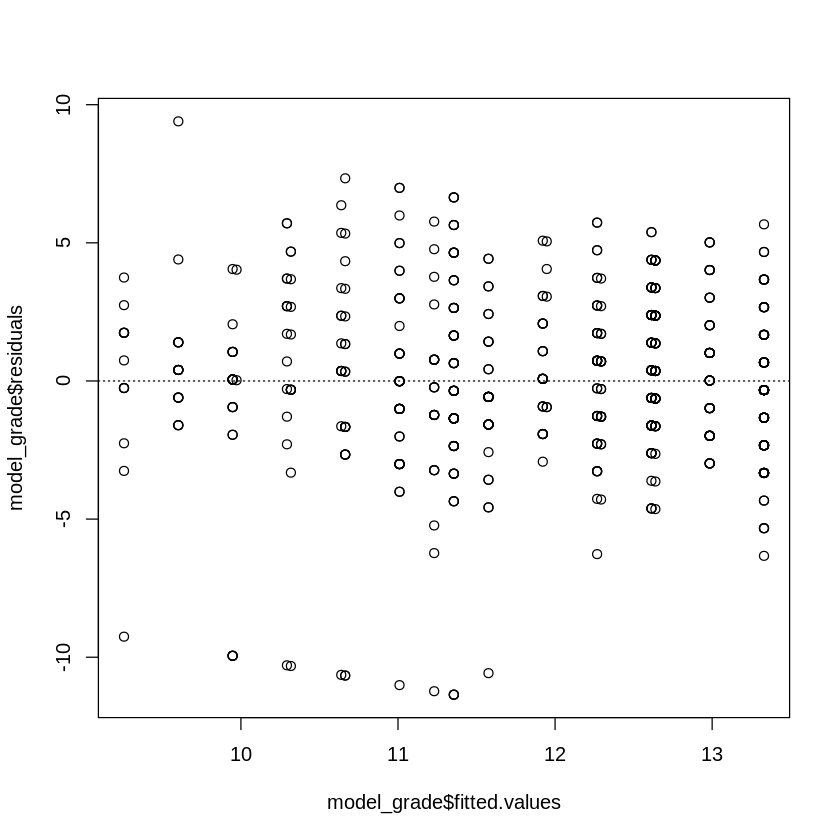

In [ ]:
plot(y=model_grade$residuals, x=model_grade$fitted.values)
abline(h = 0, lty=3)

There are two things to keep in mind when checking the assumptions of the linear regression.

> The first is that the assumptions do not need to be perfect to give you a resonable estimate.

> The second is that often the way the model fails can help you build a better model.

### 6. Interpret the results

From the results above you can start to answer some of the following questions: 

> What is the association between the two variables that you tested?

> What does the confidence interval tell you about how certain you are in the sign and magnitude of that association?

> How "good" are your model predictions?
    